<a href="https://colab.research.google.com/github/KavinduKariyawasam/Image_Processing/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mounting the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Intensity transformation.

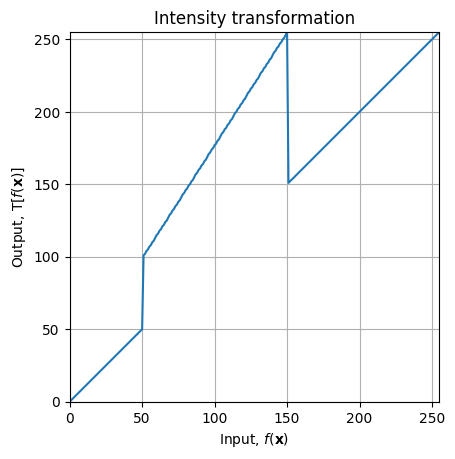

Text(0.5, 1.0, 'Transformed Image')

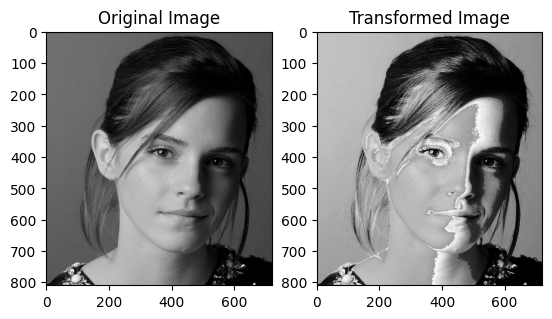

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1).astype('uint8')

t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')

t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')

t4 = np.linspace(c[2,1] + 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')

t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis = 0).astype('uint8')
transform = np.concatenate((transform,t3), axis = 0).astype('uint8')
transform = np.concatenate((transform,t4), axis = 0).astype('uint8')
transform = np.concatenate((transform,t5), axis = 0).astype('uint8')

fig, ax = plt.subplots()

ax.plot(transform)
ax.set_title("Intensity transformation")
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.grid(True)
ax.set_xticks(range(0,256,50))
ax.set_yticks(range(0,256,50))

plt.show()

img = cv.imread('/content/drive/MyDrive/Image processing/Assignment1/emma.jpg', cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img, transform)

f, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image')

ax[1].imshow(img_transformed, cmap = 'gray')
ax[1].set_title('Transformed Image')

##2. Transformations to accentuate white matter and gray matter in the brain proton density image.

Text(0.5, 1.0, 'Accentuate white matter')

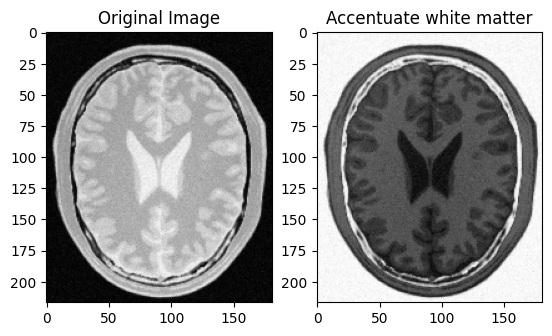

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Defining the transform to accentuate white matter
transform_white = np.arange(255,-1, -1).astype('uint8')

# Load the image of the brain proton
img = cv.imread('/content/drive/MyDrive/Image processing/Assignment1/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

img_tr_white = cv.LUT(img, transform_white)

f, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image')

ax[1].imshow(img_tr_white, cmap = 'gray')
ax[1].set_title('Accentuate white matter')

##3. Gamma correction

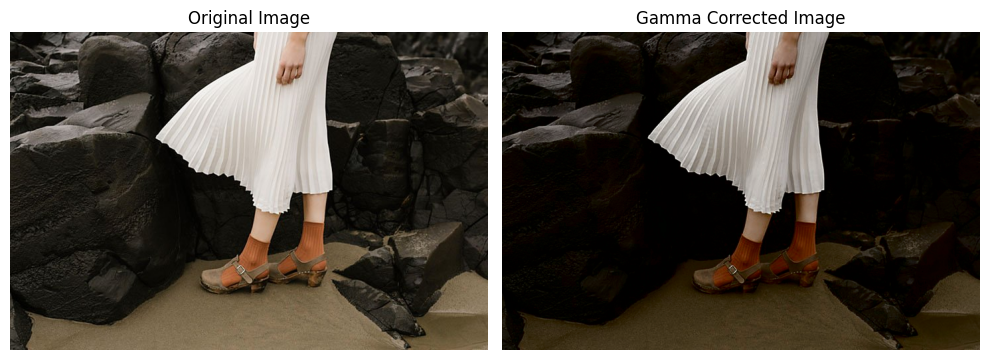

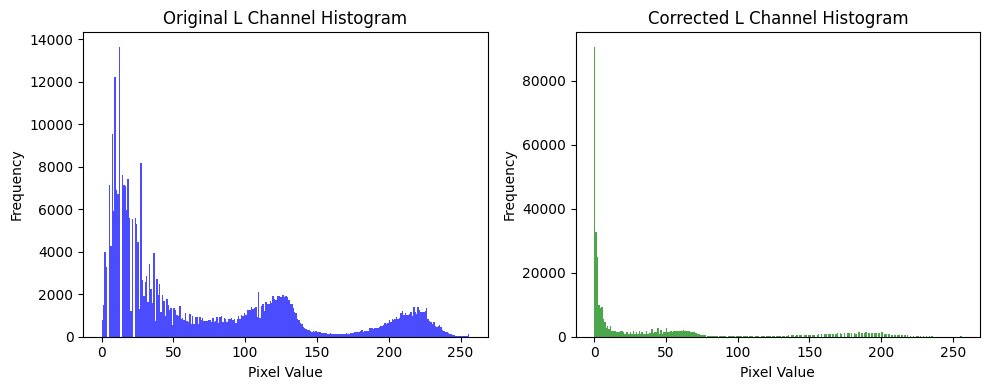

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_bgr = cv.imread('/content/drive/MyDrive/Image processing/Assignment1/highlights_and_shadows.jpg')

# Convert the image to L*a*b* color space
img_lab = cv.cvtColor(img_bgr, cv2.COLOR_BGR2Lab)

# Extract the L channel
L_channel = img_lab[:,:,0]

# Apply gamma correction to the L channel
gamma = 2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
L_corrected = cv.LUT(L_channel, table)

# Replace the corrected L channel in the image
img_lab_corrected = img_lab.copy()
img_lab_corrected[:,:,0] = L_corrected

# Convert the corrected image back to BGR format
img_corrected_bgr = cv.cvtColor(img_lab_corrected, cv.COLOR_Lab2BGR)
img_corrected_rgb = cv.cvtColor(img_corrected_bgr, cv.COLOR_BGR2RGB)

# Display the original and corrected images
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_corrected_rgb)
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display histograms of the original and corrected L channels
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(L_channel.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Original L Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(L_corrected.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.title('Corrected L Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


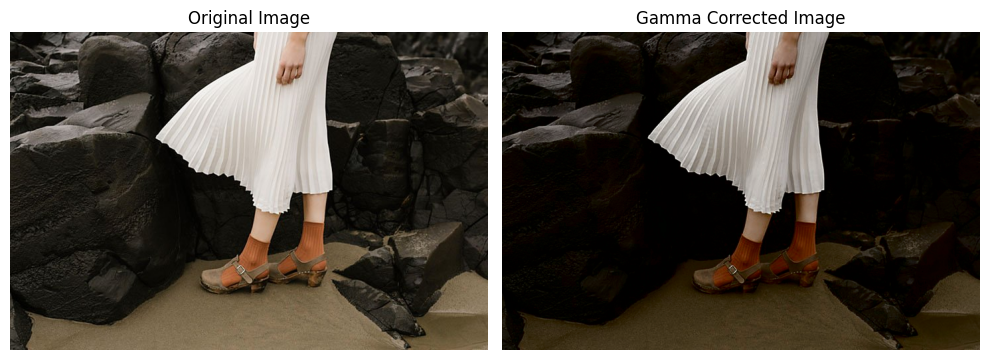

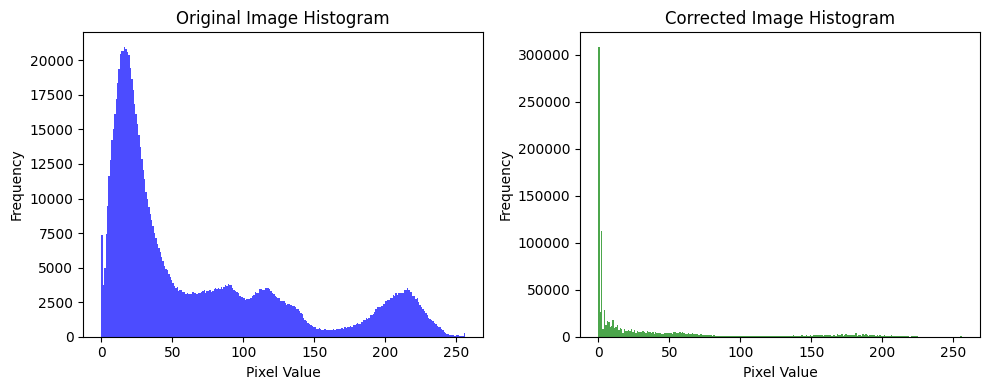

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in BGR format
img_bgr = cv2.imread('/content/drive/MyDrive/Image processing/Assignment1/highlights_and_shadows.jpg')

# Convert to L*a*b* color space
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2Lab)

# Extract the L channel
L_channel = img_lab[:,:,0]

# Apply gamma correction to the L channel
gamma = 2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
L_corrected = cv2.LUT(L_channel, table)

# Replace the corrected L channel in the image
img_lab_corrected = img_lab.copy()
img_lab_corrected[:,:,0] = L_corrected

# Convert the corrected image back to BGR format
img_corrected_bgr = cv2.cvtColor(img_lab_corrected, cv2.COLOR_Lab2BGR)
img_corrected_rgb = cv2.cvtColor(img_corrected_bgr, cv2.COLOR_BGR2RGB)

# Display the original and corrected images
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_corrected_rgb)
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display histograms of the original and corrected images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(img_bgr.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(img_corrected_bgr.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.title('Corrected Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 4. Increasing the vibrance of a photograph

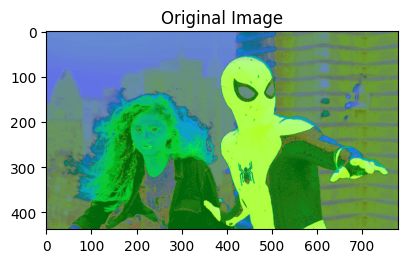

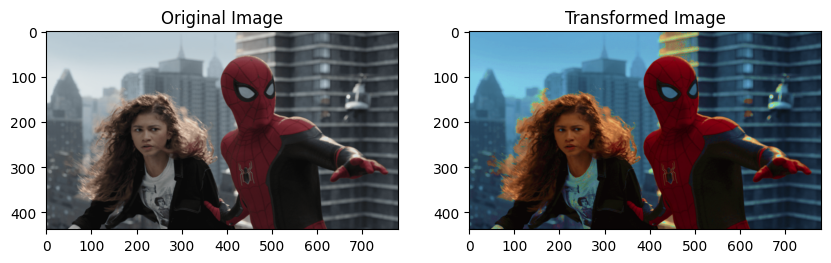

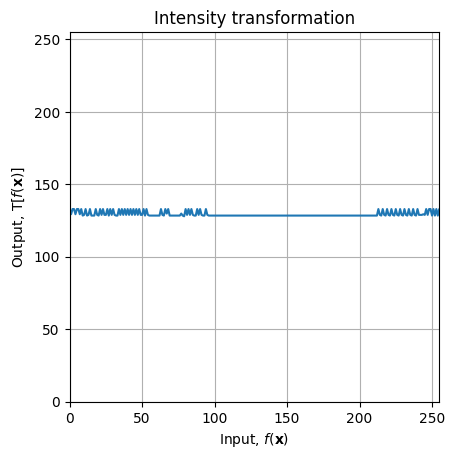

In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, hsv2rgb

# Load the image
img_bgr = cv2.imread('/content/drive/MyDrive/Image processing/Assignment1/spider.png')

# Convert to HSV (Hue, Saturation and Value) color space
img_original = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

H_channel = img_hsv[:,:,0]
S_channel = img_hsv[:,:,1]
V_channel = img_hsv[:,:,2]

# Defining the transformation
sigma = 70
x = S_channel
a = 0.8       # select a value between [0,1]

transform = np.minimum(x+ (a*128*np.exp((-(x-128)**2)/(2*(sigma**2)))), 255)

img_lab_corrected = img_hsv.copy()
img_lab_corrected[:,:,1] = transform

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_lab_corrected)
plt.title('Original Image')
#transformed_hsv_image = cv2.merge([H_channel, transform, V_channel])

# Convert back to RGB color space
transformed_rgb_image = cv2.cvtColor(img_lab_corrected, cv2.COLOR_HSV2RGB)

# Display original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_original)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(transformed_rgb_image)
plt.title('Transformed Image')

plt.show()

fig, ax = plt.subplots()

ax.plot(transform.flatten())
ax.set_title("Intensity transformation")
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.grid(True)
ax.set_xticks(range(0,256,50))
ax.set_yticks(range(0,256,50))